------------------------------------------------------------------------------------------------------------
Beta coefficient = 1
Expected Ratio:  0.8296
Expected Diversity  0.0015

Number of simulations:  49
Median Ratio:  0.8269023417939663
Diversity median:  0.000769411
------------------------------------------------------------------------------------------------------------
Beta coefficient = 2
Expected Ratio:  0.8296
Expected Diversity  0.0015

Number of simulations:  49
Median Ratio:  0.8422201503071837
Diversity median:  0.000730284
------------------------------------------------------------------------------------------------------------
Beta coefficient = 5
Expected Ratio:  0.8296
Expected Diversity  0.0015

Number of simulations:  49
Median Ratio:  0.8713642462060325
Diversity median:  0.000629627
------------------------------------------------------------------------------------------------------------
Beta coefficient = 10
Expected Ratio:  0.8296
Expected Diversity  0.0

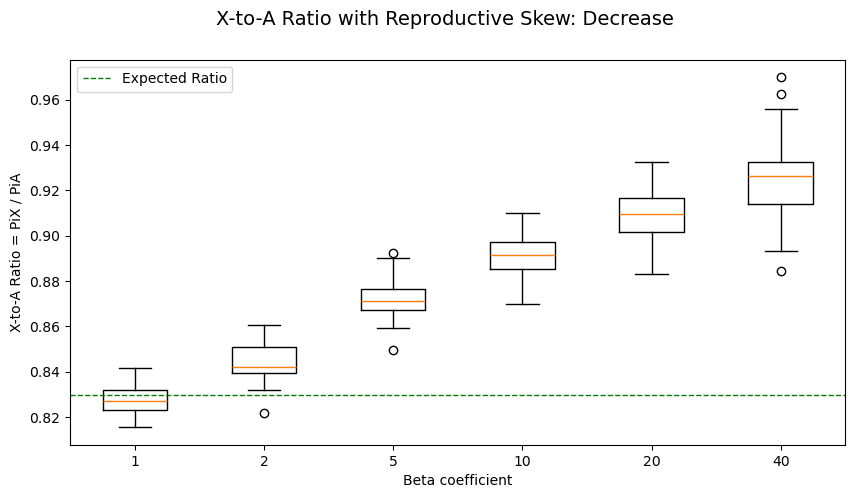

------------------------------------------------------------------------------------------------------------
Autosome Diversity



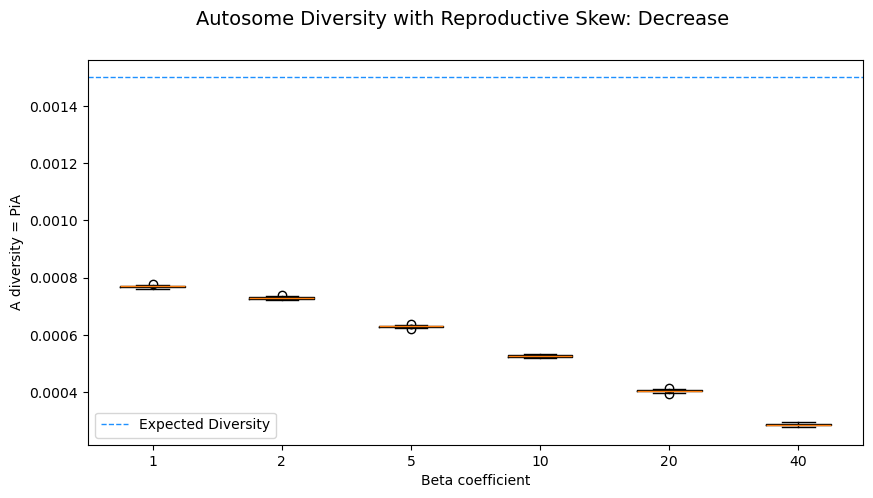

In [1]:
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/RepSkew/NWFLT_RepSkew_Decrease/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/RepSkew/NWFLT_RepSkew_Decrease/"

Beta = [1,2,5,10,20,40]
LRatio= [0 for k in range (len(Beta))]
LA = [0 for k in range (len(Beta))]
counter = 0

expected_ratio = 0.8296
SR = 0.5
Ne = 4*750*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
expected_teta = round (4*Ne*40*1.25e-8,10)

for beta in Beta:
    XtoA = []
    A = []
    for NUM in range(1,51):
        File = FOLDER+"NWFLT_Pi_RepSkew_Decrease_Beta"+str(beta)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                XtoA.append(float(Values[1])/float(Values[0]))
                A.append(float(Values[0]))
            Text.close()
            
    LRatio[counter] = XtoA
    LA[counter] = A
    counter += 1
    Ratio_median = np.median(XtoA)
    A_median = np.median(A)
    print("------------------------------------------------------------------------------------------------------------")
    print("Beta coefficient = "+str(beta))
    print("Expected Ratio: ",expected_ratio)
    print("Expected Diversity ", expected_teta)
    print()
    print("Number of simulations: ",len(XtoA))
    print("Median Ratio: ",Ratio_median)
    print("Diversity median: ",A_median)

print("------------------------------------------------------------------------------------------------------------")
print("X-to-A Ratio")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("X-to-A Ratio with Reproductive Skew: Decrease", fontsize=14)

ax.boxplot(LRatio,tick_labels=Beta)
ax.set_xlabel("Beta coefficient")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
ax.legend()

fig.savefig(FOLDER_output+'RepSkew_Decrease_PiRatio.png') 
mp.show()

print("------------------------------------------------------------------------------------------------------------")
print("Autosome Diversity")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("Autosome Diversity with Reproductive Skew: Decrease", fontsize=14)

ax.boxplot(LA,tick_labels=Beta)
ax.set_xlabel("Beta coefficient")
ax.set_ylabel("A diversity = PiA")
ax.axhline(y=expected_teta, color='dodgerblue', linestyle='--',linewidth=1, label='Expected Diversity')
ax.legend() 

fig.savefig(FOLDER_output+'RepSkew_Decrease_PiA.png') 
mp.show()

In [2]:
#Number of offsprings
import matplotlib.pyplot as mp
import numpy as np
import os 
from collections import Counter
import pandas as pd
from scipy.stats import multinomial
from IPython.display import display

#------------------------------------------------------------------------------------------------------------------
## Fonctions
#------------------------------------------------------------------------------------------------------------------

def Multinomial (n,p):
    """
    Fonction qui simule la realisation d'une d'une loi multinomial de parametres n et p 
    """
    Sortie = [0 for j in range (len(p))]
    for k in range(n):
        u = random.random()
        i = 0
        sp = p[i]
        while u >= sp:
            i += 1
            sp += p[i]
        Sortie [i] += 1
    return Sortie     

def M(r,r_bar,R,N):
    S = 0
    for i in range(N):
        S+= (r[i] - r_bar[i])**2
    return (N/R**2)*S

#------------------------------------------------------------------------------------------------------------------
## Main Program
#------------------------------------------------------------------------------------------------------------------
FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/RepSkew/NWFLT_RepSkew_Decrease/"
#FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/NWF_AoD_NOff_AD/"

Beta = [1,2,5,10,20,40]
Data = pd.DataFrame({})
Param = pd.DataFrame({})

for beta in Beta:
    LRm = []
    LTm = []
    LNm = []
    LRSm = []
    LRf = []
    LTf = []
    LNf = []
    LRSf = []
    
    for i in range(1,51):
        rf = []
        rm = []
        tf = []
        tm = []
        File = FOLDER + f'NWFLT_aod_no_RepSkew_Decrease_Beta{beta},{i}.txt'
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            #print(beta,i,len(Values))
            for i in range (0,30000,3):
                if Values[i] == "F":
                    if float(Values[i+1]) > 3: 
                        rf.append(float(Values[i+2]))
                        tf.append(float(Values[i+1])-4)
                elif Values[i] == "M":
                    if float(Values[i+1]) > 4: 
                        rm.append(float(Values[i+2]))
                        tm.append(float(Values[i+1])-5)
            
            Text.close()
            
            # Males Reproductive Skew
            Rm = sum(rm)
            Tm = sum(tm) 
            Nm = len(rm)
            rm_bar = []
            #print(beta, Rm)
            for ti in tm:
                rm_bar.append(ti*Rm/Tm)
            Mm_observed = M(rm,rm_bar,Rm,Nm)
            Mm_multi = 0
            for j in range (10):
                rm_multi = multinomial.rvs(Rm, [ti/Tm for ti in tm])
                Mm_multi += M(rm_multi,rm_bar,Rm,Nm)
            RSm = Mm_observed - Mm_multi/10
                    
            # Females Reproductive Skew
            Rf = sum(rf)
            Tf = sum(tf) 
            Nf = len(rf)
            rf_bar = []
            for ti in tf:
                rf_bar.append(ti*Rf/Tf)
            Mf_observed = M(rf,rf_bar,Rf,Nf)
            Mf_multi = 0
            for j in range (10):
                rf_multi = multinomial.rvs(Rf, [ti/Tf for ti in tf])
                Mf_multi += M(rf_multi,rf_bar,Rf,Nf)
            RSf = Mf_observed - Mf_multi/10 
    
            LRm.append(Rm)
            LTm.append(Tm)
            LNm.append(Nm)
            LRSm.append(RSm)
            LRf.append(Rf)
            LTf.append(Tf)
            LNf.append(Nf)
            LRSf.append(RSf)

    Rm_mean = np.mean(LRm) 
    Nm_mean = np.mean(LNm)
    Tm_mean = np.mean(LTm)
    RSm_mean = np.mean(LRSm)
    Rf_mean = np.mean(LRf) 
    Nf_mean = np.mean(LNf)
    Tf_mean = np.mean(LTf)
    RSf_mean = np.mean(LRSf)

    Model = pd.DataFrame([{"Males": RSm_mean, 'Females': RSf_mean, "Maximum": Nf_mean, 'Minimum': -Nf_mean/Rf_mean}],index=['β = '+str(beta)])
    Data = pd.concat([Data, Model])

    Model_par = pd.DataFrame([{"Nm": Nm_mean, 'Nf': Nf_mean, "Rm": Rm_mean, 'Rf': Rf_mean, "tm_mean": Tm_mean/Nm_mean, 'tf_mean': Tf/Nf}],index=['β = '+str(beta)])
    Param = pd.concat([Param, Model_par])

#Ploting
print()
Title = "<span style='font-size:20px; font-weight:bold;'>Reproductive Skew mean of males and females for each value of Beta: Decrease</span>"
display (
    Data.style\
        .set_table_attributes("style='width:100%; font-size:15px'")\
        .set_properties(**{'text-align': 'left'})\
        .set_table_styles([
        {'selector': 'th.col_heading', 'props': [('text-align', 'left')]},   # colonnes
        {'selector': 'th.row_heading', 'props': [('text-align', 'left')]},    # index (lignes)
        ])\
        .set_caption(Title)
)


print()
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print()
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print()
Data = Data[["Males", "Females", "Maximum", "Minimum"]]
Data.insert(2, "|", "|")
Title = "<span style='font-size:20px; font-weight:bold;'>Formula parmeters for each value of Beta: Decrease</span>"
display (
    Param.style\
        .set_table_attributes("style='width:100%; font-size:15px'")\
        .set_properties(**{'text-align': 'left'})\
        .set_table_styles([
        {'selector': 'th.col_heading', 'props': [('text-align', 'left')]},   # colonnes
        {'selector': 'th.row_heading', 'props': [('text-align', 'left')]}    # index (lignes)
        ])\
        .set_caption(Title)
)



,Males,Females,Maximum,Minimum
β = 1,0.008302,-0.073263,3290.000000,-0.329048
β = 2,0.102273,-0.075615,3274.428571,-0.327664
β = 5,0.644982,-0.075287,3284.265306,-0.328534
β = 10,1.627125,-0.075453,3280.448980,-0.328297
β = 20,3.507154,-0.077087,3287.428571,-0.329002
β = 40,6.790053,-0.077783,3285.387755,-0.328648



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------



,Nm,Nf,Rm,Rf,tm_mean,tf_mean
β = 1,3039.591837,3290.000000,10004.061224,9998.551020,9.450839,12.028580
β = 2,3047.163265,3274.428571,9995.734694,9993.244898,9.417397,12.136378
β = 5,3028.244898,3284.265306,10002.204082,9996.734694,9.438410,12.159854
β = 10,3047.734694,3280.448980,9997.469388,9992.326531,9.452045,12.175676
β = 20,3037.244898,3287.428571,9999.959184,9992.122449,9.427663,12.143120
β = 40,3050.122449,3285.387755,9995.102041,9996.673469,9.453398,11.897205


-----------------------------------------------------------------------------------------------------------------------
Beta coefficient = 1
Max Male Number of Offsprings =  21.0


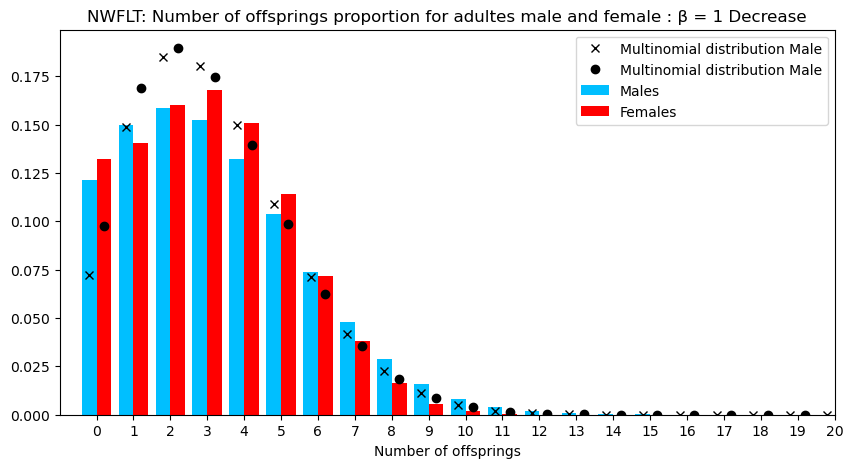

-----------------------------------------------------------------------------------------------------------------------
Beta coefficient = 2
Max Male Number of Offsprings =  23.0


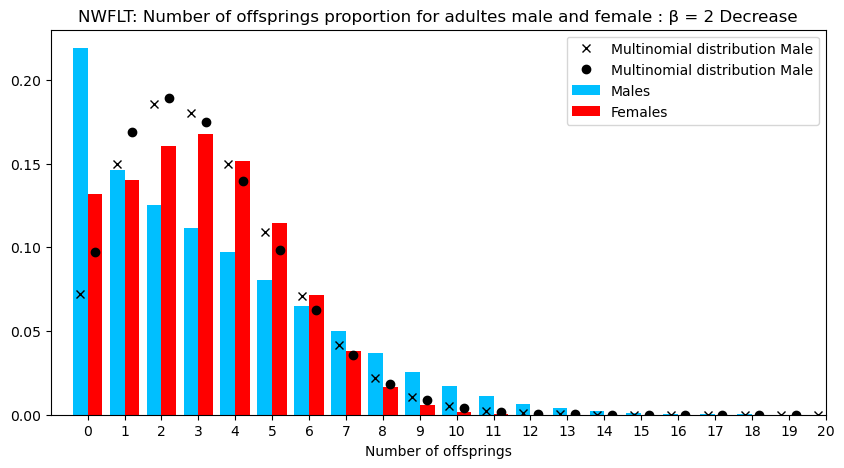

-----------------------------------------------------------------------------------------------------------------------
Beta coefficient = 5
Max Male Number of Offsprings =  36.0


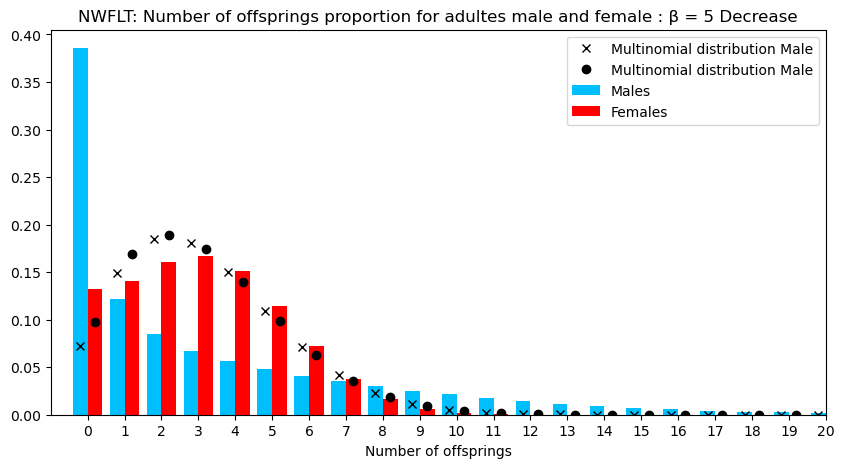

-----------------------------------------------------------------------------------------------------------------------
Beta coefficient = 10
Max Male Number of Offsprings =  53.0


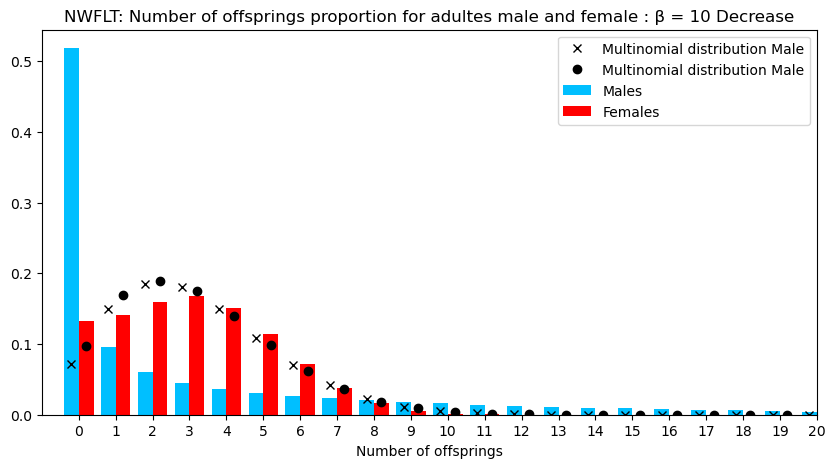

-----------------------------------------------------------------------------------------------------------------------
Beta coefficient = 20
Max Male Number of Offsprings =  78.0


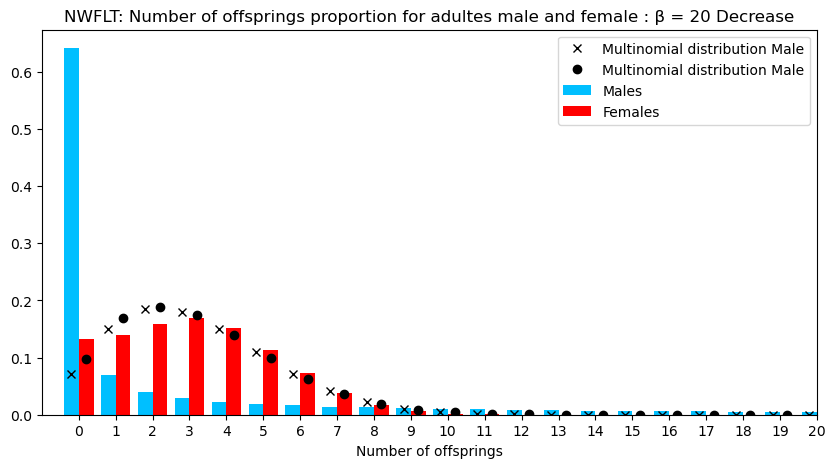

-----------------------------------------------------------------------------------------------------------------------
Beta coefficient = 40
Max Male Number of Offsprings =  114.0


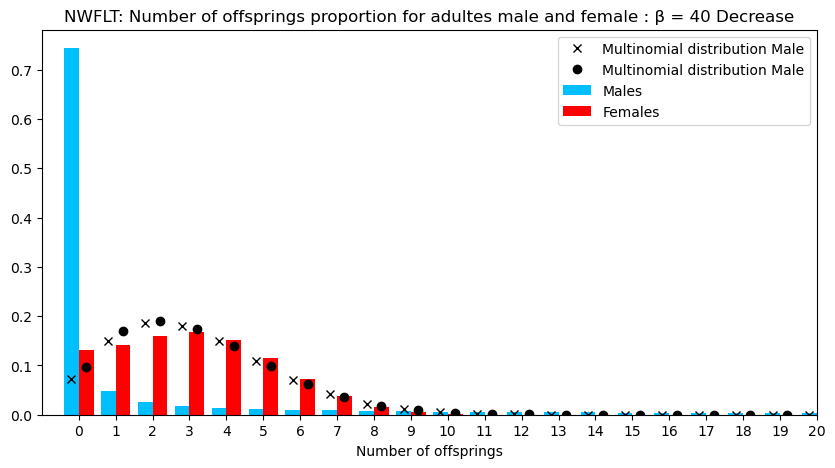

In [3]:
#Number of offsprings
import matplotlib.pyplot as mp
import numpy as np
import os 
from collections import Counter
from scipy.stats import multinomial

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/RepSkew/NWFLT_RepSkew_Decrease/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/RepSkew/NWFLT_RepSkew_Decrease/"

Beta = [1,2,5,10,20,40]
for beta in Beta:
    Noffspringsf = []
    Noffspringsm = []
    Agef = []
    Agem = []
    
    for i in range (1,51):
        File = FOLDER + f'NWFLT_aod_no_RepSkew_Decrease_Beta{beta},{i}.txt'
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            
            for i in range (0,len(Values),3):
                if Values[i] == "F":
                    if float(Values[i+1]) > 3:
                        Noffspringsf.append(float(Values[i+2]))
                        Agef.append(float(Values[i+1]))
                elif Values[i] == "M":
                     if float(Values[i+1]) > 4:
                        Noffspringsm.append(float(Values[i+2]))
                        Agem.append(float(Values[i+1]))
            Text.close()
    print("-----------------------------------------------------------------------------------------------------------------------")
    print('Beta coefficient = '+str(beta))
    print('Max Male Number of Offsprings = ', max(Noffspringsm))

    Nf = len(Noffspringsf)
    Nm = len(Noffspringsm)
    Rf = sum(Noffspringsf)
    Rm = sum(Noffspringsm)
    Tm = sum(Agem)
    Tf = sum(Agef)


    #Multinomial distribution
    Multi_m = []
    Multi_f = []
    for i in range (10):
        rm_multi = multinomial.rvs(Rm, [Agem[j]/Tm for j in range(len(Agem))])
        rf_multi = multinomial.rvs(Rf, [Agef[j]/Tf for j in range(len(Agef))])
        Multi_m.append(rm_multi)
        Multi_f.append(rf_multi)
    Multi_m = [element for sous_liste in Multi_m for element in sous_liste]
    Multi_f = [element for sous_liste in Multi_f for element in sous_liste]
    Noff_m_multi = Multi_m
    Noff_f_multi = Multi_f
    
    Noffspringsf_multi = Counter(Noff_f_multi)
    Noffspringsm_multi = Counter(Noff_m_multi)
    all_Noffsprings_multi = sorted(set(Noffspringsf_multi.keys()).union(Noffspringsm_multi.keys()))
    total_m_multi = sum(Noffspringsm_multi.values())
    total_f_multi = sum(Noffspringsf_multi.values())
    prop_m_multi = [Noffspringsm_multi.get(Noffsprings, 0) / total_m_multi for Noffsprings in all_Noffsprings_multi]
    prop_f_multi = [Noffspringsf_multi.get(Noffsprings, 0) / total_f_multi for Noffsprings in all_Noffsprings_multi]

    x_multi = np.arange(len(all_Noffsprings_multi))
        
    # Number of offsprings
    Noffspringsf = Counter(Noffspringsf)
    Noffspringsm = Counter(Noffspringsm)
    all_Noffsprings = sorted(set(Noffspringsf.keys()).union(Noffspringsm.keys()))
    total_m = sum(Noffspringsm.values())
    total_f = sum(Noffspringsf.values())
    prop_m = [Noffspringsm.get(Noffsprings, 0) / total_m for Noffsprings in all_Noffsprings]
    prop_f = [Noffspringsf.get(Noffsprings, 0) / total_f for Noffsprings in all_Noffsprings]
    
    x = np.arange(len(all_Noffsprings))
    width = 0.4  # largeur des barres
    
    fig1, ax1 = mp.subplots(figsize=(10, 5))
    ax1.bar(x - width/2, prop_m, width, label='Males', color='deepskyblue')
    ax1.bar(x + width/2, prop_f, width, label='Females', color='red')
    ax1.plot(x_multi - width/2, prop_m_multi, marker='x', linestyle='None', color='black', label='Multinomial distribution Male')
    ax1.plot(x_multi + width/2, prop_f_multi, marker='o', linestyle='None', color='black', label='Multinomial distribution Male')

    ax1.set_title(f"NWFLT: Number of offsprings proportion for adultes male and female : β = {beta} Decrease")
    ax1.set_xlabel("Number of offsprings")
    ax1.set_xticks(range(0,int(max(Noffspringsm))))
    ax1.set_xlim([-1,20])
    ax1.legend()
    fig1.savefig(FOLDER_output+f'RepSkew_Decrease_Noff{beta}.png') 
    mp.show()